# Assignment 02 – Generative and Non-Generative Methods

#### Group 5 - Kaiyue Wei - kw823
#### Team number - Your FirstName LastName - GUID
#### Team number - Your FirstName LastName - GUID
#### Team number - Your FirstName LastName - GUID

# Initialization 

## Load the dataset. (0.5 x 2)

In [1]:
import urllib.request
url_g05 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
filename_g05 = 'datasets/online_shoppers_intention.csv'
urllib.request.urlretrieve(url_g05, filename_g05)

('datasets/online_shoppers_intention.csv',
 <http.client.HTTPMessage at 0x10f183fd0>)

## Show first 6 data points using head(). (0.5 x 2)

In [1]:
import pandas as pd
filename_g05 = 'datasets/online_shoppers_intention.csv'
OSI_g05 = pd.read_csv(filename_g05, header=0)
OSI_g05["Weekend"] = OSI_g05["Weekend"].astype(int)
OSI_g05["Revenue"] = OSI_g05["Revenue"].astype(int)

month_dict_g05 = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "June":6, "Jul":7, "Aug":8, "Sep":9, "Oc t":10, "Nov":11, "Dec":12}
OSI_g05["Month"] = OSI_g05["Month"].map(month_dict_g05)

OSI_g05.insert(loc=16, column="VisitorTypeNumeric", value=pd.factorize(OSI_g05['VisitorType'])[0] + 1)
OSI_g05 = OSI_g05.drop('VisitorType', 1)

OSI_g05.head(6)

/var/folders/lc/5bgvdqzs30316llbpd2nwp1h0000gn/T/ipykernel_12673/97515888.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  OSI_g05 = OSI_g05.drop('VisitorType', 1)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2.0,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2.0,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2.0,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2.0,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2.0,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2.0,2,2,1,3,1,0,0


## Describe the Dataframe by using describe. (0.5 x 2) 

In [3]:
OSI_g05.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,11781.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.542569,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.432046,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

Text(0.5, 1.0, 'Heat Map of Online Shoppers Intention Dataset')

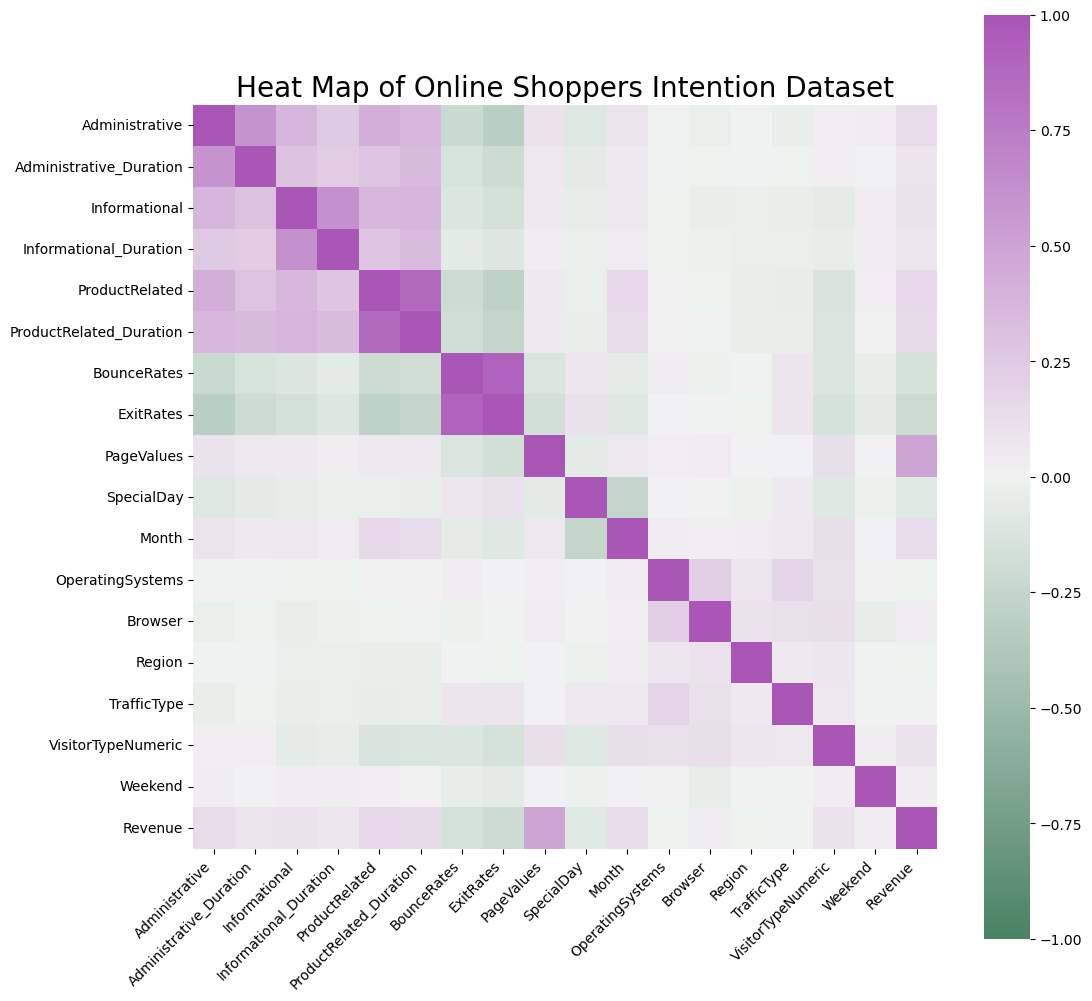

In [4]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr_OSI_g05 = OSI_g05.corr()
ax_OSI_g05 = sns.heatmap(
    corr_OSI_g05, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    square=True
)
ax_OSI_g05.set_xticklabels(
    ax_OSI_g05.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax_OSI_g05.set_title(
    "Heat Map of Online Shoppers Intention Dataset",
    fontdict={"size":20}
)

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


array([[<AxesSubplot: title={'center': 'Administrative'}>,
        <AxesSubplot: title={'center': 'Administrative_Duration'}>,
        <AxesSubplot: title={'center': 'Informational'}>,
        <AxesSubplot: title={'center': 'Informational_Duration'}>],
       [<AxesSubplot: title={'center': 'ProductRelated'}>,
        <AxesSubplot: title={'center': 'ProductRelated_Duration'}>,
        <AxesSubplot: title={'center': 'BounceRates'}>,
        <AxesSubplot: title={'center': 'ExitRates'}>],
       [<AxesSubplot: title={'center': 'PageValues'}>,
        <AxesSubplot: title={'center': 'SpecialDay'}>,
        <AxesSubplot: title={'center': 'Month'}>,
        <AxesSubplot: title={'center': 'OperatingSystems'}>],
       [<AxesSubplot: title={'center': 'Browser'}>,
        <AxesSubplot: title={'center': 'Region'}>,
        <AxesSubplot: title={'center': 'TrafficType'}>,
        <AxesSubplot: title={'center': 'VisitorTypeNumeric'}>],
       [<AxesSubplot: title={'center': 'Weekend'}>,
        <Axe

<Figure size 1800x1800 with 0 Axes>

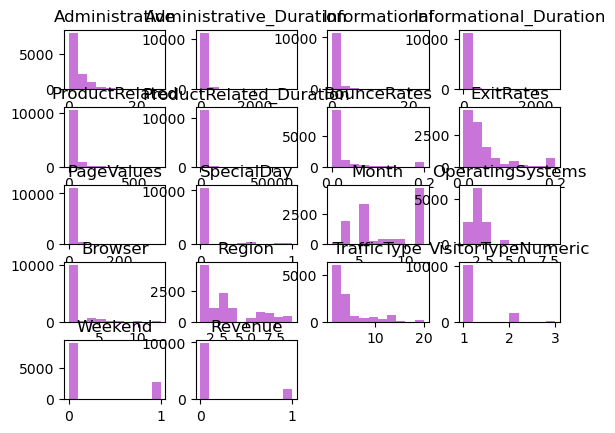

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12),dpi=150)
OSI_g05.hist(color='#C874D9', grid=False)

In [3]:
print("Unique values of Revenue variable: ", OSI_g05['Revenue'].unique())
print("Unique values of Special_Day variable: ", sorted(OSI_g05['SpecialDay'].unique()))
print("Unique values of Browser variable: ", sorted(OSI_g05['Browser'].unique()))
print("Unique values of TrafficType variable: ", sorted(OSI_g05['TrafficType'].unique()))

Unique values of Revenue variable:  [0 1]
Unique values of Special_Day variable:  [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
Unique values of Browser variable:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Unique values of TrafficType variable:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


***Numerical:***

Administrative
- The distribution plot of variable Administrative shows that the mean is around 2.3 with a standard deviation of around 3.3. The distribution is skewed towards the left, which means that there are more values on the left side of the distribution than on the right side.

Administrative Duration & Informational & Informational Duration & ProductRelated & ProductRelated Duration & Page Values
- The distribution plot of these variables have very similar distribution. Their distributions are skewed towards the left with a sharp peak at the minimum value, most of their values are on the left side (fall in the first left bin).
- `Administrative Duration` variable has the mean around 80.82 with a standard deviation around 176.78.
- `Informational` variable has the mean around 0.5 with a standard deviation around 1.27.
- `Informational Duration` variable has the mean around 34.47 with a standard deviation around 140.75.
- `ProductRelated` variable has the mean around 31.73 with a standard deviation around 44.48.
- `ProductRelated Duration` variable has the mean around 1194.75 with a standard deviation around 1913.67.
- `Page Values` variable has the mean around 5.89 with a standard deviation around 18.57.

BounceRates & ExitRates
- The distribution plot of these variables have similar distribution. Their distributions are skewed towards the left, which means that there are more values on the left side of the distribution with small values in the other bins and a slightly higher value in the last right bin.
- `BounceRates` variable has the mean around 0.02 with a standard deviation around 0.05.
- `ExitRates` variable has the mean around 0.04 with a standard deviation around 0.05.


***Categorical:***

Special Day
- From the distribution plot of Special Day, the most common value is 0. Very few data points in the other categories.

Operating Systems
- From the distribution plot of Operating Systems, the most common value is 2, followed by 1 and 3. Very few data points in the other categories.

Browser
- From the distribution plot of Browser, the most common value is 1. Very few data points in the other categories.

Region
- From the distribution plot of Region, the most common value is 1, followed by 3 and then 2 & 4. Some data points in the other categories.

Traffic Type
- From the distribution plot of Traffic Type, the distribution is skewed towards the left. The most common value is 1, followed by 2. Few data points in the other categories.

Visitor Type Numeric
- From the distribution plot of Visitor Type Numeric, the most common value is 1, followed by 2 and then 3.

Weekend
- Weekend varible is binary category. From its distribution plot, the most common value is 0.

Revenue
- Revenue varible is binary category. From its distribution plot, the most common value is 0.

## Load the dataset. (0.5 x 2)

In [7]:
import pandas as pd
filename_BSH_g05 = 'datasets/Bike-Sharing-Hour.csv'
BSH_g05 = pd.read_csv(filename_BSH_g05, header=0)

## Show first 6 data points using head(). (0.5 x 2)

In [8]:
import pandas as pd
BSH_g05.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


## Describe the Dataframe by using describe. (0.5 x 2) 

In [9]:
BSH_g05.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

/var/folders/lc/5bgvdqzs30316llbpd2nwp1h0000gn/T/ipykernel_7396/1806901216.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_BSH_g05 = BSH_g05.corr()


Text(0.5, 1.0, 'Heat Map of Bike Sharing Hourly Dataset')

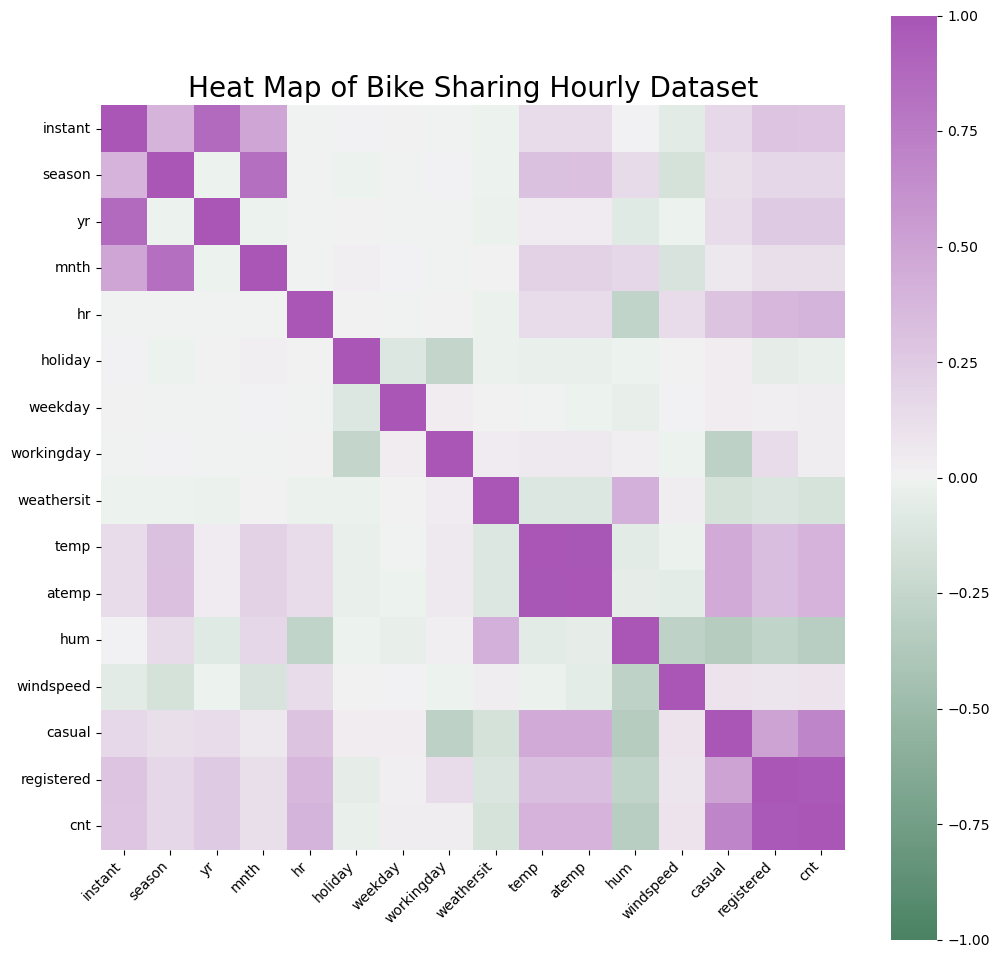

In [10]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr_BSH_g05 = BSH_g05.corr()
ax_BSH_g05 = sns.heatmap(
    corr_BSH_g05, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    square=True
)
ax_BSH_g05.set_xticklabels(
    ax_BSH_g05.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax_BSH_g05.set_title(
    "Heat Map of Bike Sharing Hourly Dataset",
    fontdict={"size":20}
)

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


array([[<AxesSubplot: title={'center': 'instant'}>,
        <AxesSubplot: title={'center': 'season'}>,
        <AxesSubplot: title={'center': 'yr'}>,
        <AxesSubplot: title={'center': 'mnth'}>],
       [<AxesSubplot: title={'center': 'hr'}>,
        <AxesSubplot: title={'center': 'holiday'}>,
        <AxesSubplot: title={'center': 'weekday'}>,
        <AxesSubplot: title={'center': 'workingday'}>],
       [<AxesSubplot: title={'center': 'weathersit'}>,
        <AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'atemp'}>,
        <AxesSubplot: title={'center': 'hum'}>],
       [<AxesSubplot: title={'center': 'windspeed'}>,
        <AxesSubplot: title={'center': 'casual'}>,
        <AxesSubplot: title={'center': 'registered'}>,
        <AxesSubplot: title={'center': 'cnt'}>]], dtype=object)

<Figure size 1800x1800 with 0 Axes>

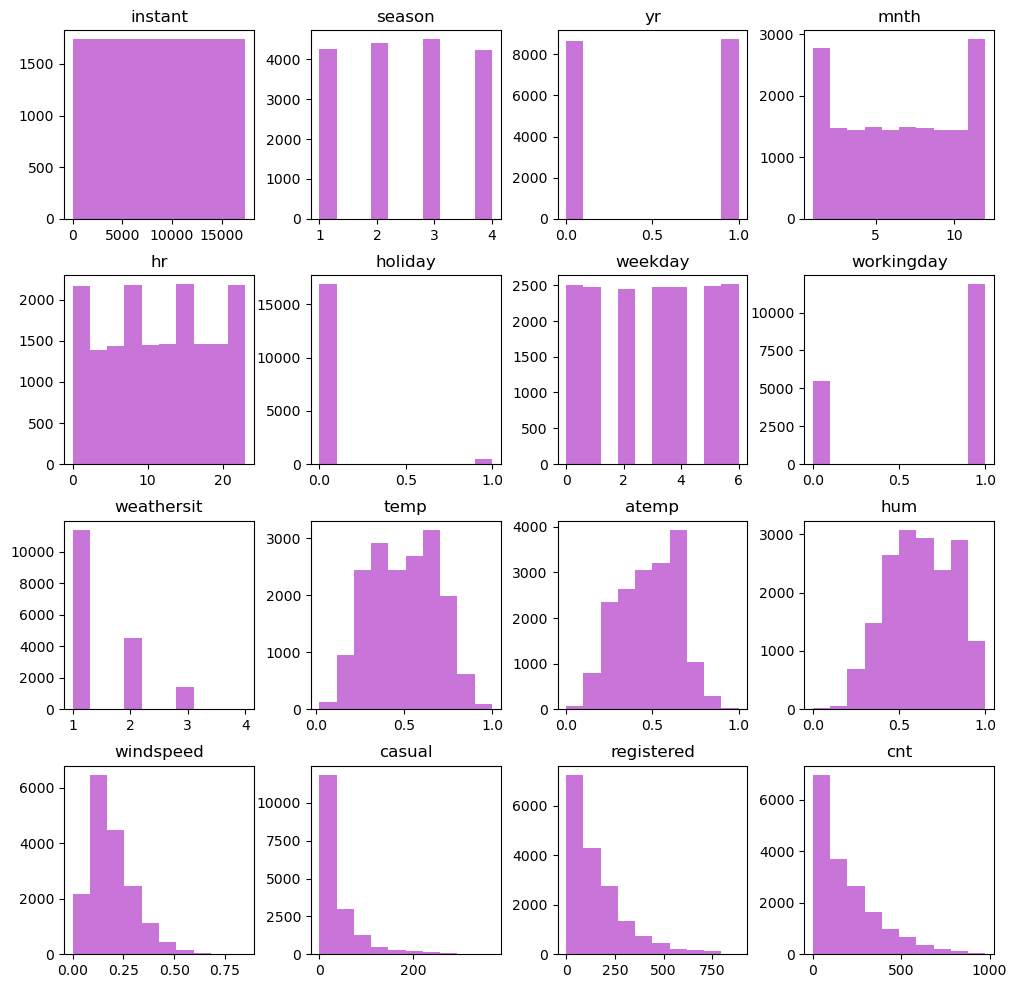

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12),dpi=150)
BSH_g05.hist(color='#C874D9', grid=False)

# Intermediate Steps (Essential, no points granted)

In [4]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

OSI_g05.dropna(inplace=True)
X_OSI_g05 = OSI_g05.loc[:, OSI_g05.columns != 'Revenue'].to_numpy()
y_OSI_g05 = OSI_g05.iloc[:,-1:].to_numpy()

# print(X_OSI_g05)
# print(y_OSI_g05)

OSIX_train_g05, OSIX_test_g05, OSIy_train_g05, OSIy_test_g05 = train_test_split(X_OSI_g05, y_OSI_g05, test_size=0.30, random_state=5)

In [17]:
# X_BSH_g05 = BSH_g05.loc[:, BSH_g05.columns != 'cnt'].to_numpy()
X_BSH_g05 = BSH_g05.loc[:, (BSH_g05.columns != 'cnt') & (BSH_g05.columns != 'dteday')].to_numpy()
y_BSH_g05 = BSH_g05.iloc[:,-1:].to_numpy()

# print(X_BSH_g05)
# print(y_BSH_g05)

BSHX_train_g05, BSHX_test_g05, BSHy_train_g05, BSHy_test_g05 = train_test_split(X_BSH_g05, y_BSH_g05, test_size=0.30, random_state=5)

[[16]
 [40]
 [32]
 ...
 [90]
 [61]
 [49]]


# Classification (total 48)
## AdaBoost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [5]:
from sklearn.ensemble import AdaBoostClassifier

Import the AdaBoost Classifier Algorithm from the sklearn package(class) under the ensemble method/category.

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [6]:
OSI_clf_ada_g05 = AdaBoostClassifier(n_estimators=100, random_state=5)

For the AdaBoostClassifier, we do not specify the base learner, so it will use the default decision tree algorithm. 

`n_estimators`, which is the number of base estimators, sets to 100, so that 100 decision trees will be used to build the ensemble adaboost.

`random_state` sets to 5 which represent the group number in order to ensure to get the same result with same random state number.

### Train classifier on train data and explain what you did. (1.5) 

In [7]:
OSI_ada_fit_g05 = OSI_clf_ada_g05.fit(OSIX_train_g05, OSIy_train_g05.ravel())

`OSI_clf_ada_g05` classifier will be used to train the ada boosting model with input variables training x `OSIX_train_g05`, on target label training y `OSIy_train_g05`.
- `ravel()` used to convert a 2D array into a 1D array

`OSI_ada_fit_g05` used to store the trained classifier 

### Test/fit classifier test data and explain what you did. (1.5)

In [8]:
OSIy_pred_g05 = OSI_ada_fit_g05.predict(OSIX_test_g05)

Use the trained AdaBoost classifier `OSI_ada_fit_g05` to make predictions on the test data `OSIX_test_g05`, and store the predicted labels in  `OSIy_pred_g05`.

### Calculate accuracy and explain what you did. (1.5)

In [9]:
OSI_Ada_accuracy_g05 = accuracy_score(y_true=OSIy_test_g05, y_pred=OSIy_pred_g05)
print("AdaBoosting Classifier Accuracy: {:.2%}".format(OSI_Ada_accuracy_g05))

AdaBoosting Classifier Accuracy: 88.83%


Calculate the accuracy of the classifier's predictionswith `accuracy_score` function.

`OSIy_test_g05` y labels testing data as the `y_true` and compared with `OSIy_pred_g05` y labels predicted on testing features x from the previous step.

`OSI_Ada_accuracy_g05` stores the accuracy score calculated, and then print the result.

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2991
           1       0.66      0.56      0.60       544

    accuracy                           0.89      3535
   macro avg       0.79      0.75      0.77      3535
weighted avg       0.88      0.89      0.88      3535



<Figure size 187.5x187.5 with 0 Axes>

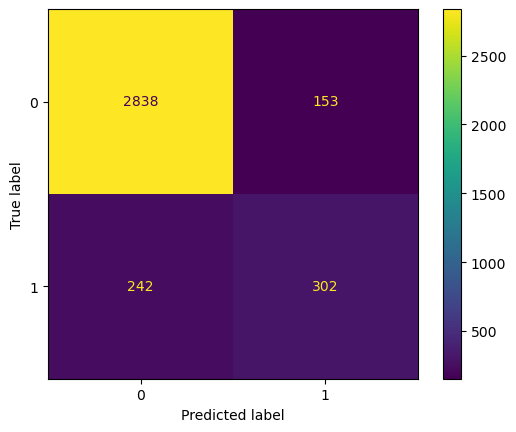

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")
OSI_conf_matrix_g05 = confusion_matrix(OSIy_test_g05, OSIy_pred_g05)
ConfusionMatrixDisplay.from_estimator(OSI_ada_fit_g05, OSIX_test_g05, OSIy_test_g05)
print(classification_report(OSIy_test_g05, OSIy_pred_g05))

Get confusion matrix based on actual testing data y label `OSIy_test_g05`, and predcted y label from x feature testing data `OSIy_pred_g05` and store in `OSI_conf_matrix_g05`.

Use `ConfusionMatrixDisplay` to visualize the confusion matrix.

Print the classification report with `OSIy_test_g05` and `OSIy_pred_g05`, whcih provides precision, recall, F1-score, and support for each class.


**The result:**

The overall accuracy is 88.83%.

The model correctly predicted the negative class (label 0) very well with 2,838 data points correctly classified as negative, and it has a relatively small number of false positives (153 data points). 

This model has some ability to recognize positive instances. It correctly predicted the positive class (label 1) for 302 data points, but it has 242 false negatives. 

It also shows that most of the data points are labeled as 0. The dataset is imbalanced, which can impact the model's performance.

### Repeat the same with a different parameter set and compare the result with (2)


AdaBoosting Classifier Accuracy: 88.63%
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2991
           1       0.67      0.53      0.59       544

    accuracy                           0.89      3535
   macro avg       0.79      0.74      0.76      3535
weighted avg       0.88      0.89      0.88      3535



<Figure size 187.5x187.5 with 0 Axes>

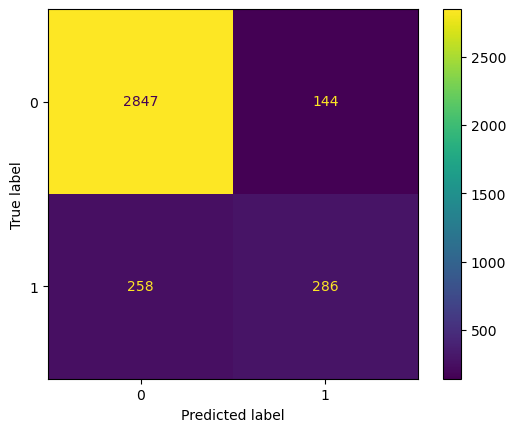

In [13]:
clf_ada_500_g05 = AdaBoostClassifier(n_estimators=500, random_state=5)

ada_fit_g05 = clf_ada_500_g05.fit(OSIX_train_g05, OSIy_train_g05.ravel())
OSIy_pred_500_g05 = ada_fit_g05.predict(OSIX_test_g05)

Ada_accuracy_g05 = accuracy_score(y_true=OSIy_test_g05, y_pred=OSIy_pred_500_g05)
print("AdaBoosting Classifier Accuracy: {:.2%}".format(Ada_accuracy_g05))
print(classification_report(OSIy_test_g05, OSIy_pred_500_g05))

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")

conf_matrix_g05 = confusion_matrix(OSIy_test_g05, OSIy_pred_500_g05)
ConfusionMatrixDisplay.from_estimator(ada_fit_g05, OSIX_test_g05, OSIy_test_g05)

The Ada boosting model with 100 numer of estimators performs better with a higher accuracy 88.83% than 500 number of estimators with the accuracy of 88.63%.

The ada boosting model with a higher number of estimators predicted the true negative data points better, but showed a decrease in its ability to predict true positive data points.

## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## Bagging
### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


# Regression (22 Points)
## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## Bagging

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


# Bonus Question (5)
For all the given classifiers (Q3), evaluate the different parameter sets including (njobs, learning rate, etc).

## For boosting and bagging compare the tradeoff between njobs and learning rate. Plot the graph of different learning rates vs number of jobs(label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between thelearning rate and n jobs. Also comment on the eolution of error for each combination(1 paragraph at least, 1.5).

## For bagging compare the tradeoff between the bootstrap features and max samples. Plot the graph of different combination of bootstrap features and max samples (label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between bootstrap features and max samples (1 paragraph at least, 1.5) 